#Theory

1. What is unsupervised learning in the context of machine learning
- Unsupervised learning is when the model learns patterns from unlabeled data, finding structure like groups or associations without target labels.


2. How does K-Means clustering algorithm work
- K-Means groups data into K clusters by iteratively assigning points to the nearest centroid and then updating centroids to the mean of assigned points until convergence.


3. Explain the concept of a dendrogram in hierarchical clustering
- A dendrogram is a tree-like diagram that shows the sequence of merges (or splits) in hierarchical clustering, letting you choose clusters by cutting the tree at a height.


4. What is the main difference between K-Means and Hierarchical Clustering
- K-Means is a flat, iterative partitioning method needing K in advance; hierarchical builds nested clusters (agglomerative or divisive) without giving K upfront.


5. What are the advantages of DBSCAN over K-Means
- DBSCAN can find arbitrarily-shaped clusters and detect noise/outliers, and it doesn't require specifying the number of clusters beforehand.


6. When would you use Silhouette Score in clustering
- Use Silhouette Score to measure how similar an object is to its own cluster vs other clusters, helpful to evaluate clustering quality and choose K.


7. What are the limitations of Hierarchical Clustering
- Hierarchical is expensive for large datasets (O(n^2) memory/time), sensitive to noise/outliers, and once a merge/split is done it cannot be undone.


8. Why is feature scaling important in clustering algorithms like K-Means
- Scaling ensures features contribute equally to distance calculations; otherwise features with larger ranges dominate clustering.


9. How does DBSCAN identify noise points
- Points that are not within eps distance of at least min_samples (i.e., not in any dense neighborhood) are labeled as noise.


10. Define inertia in the context of K-Means
- Inertia is the sum of squared distances of samples to their nearest cluster centroid; lower inertia means tighter clusters.


11. What is the elbow method in K-Means clustering
- The elbow method plots inertia vs K and looks for a point (elbow) where additional clusters give diminishing returns, suggesting a good K.


12. Describe the concept of "density" in DBSCAN
- Density refers to the number of points within an eps-radius neighborhood; dense regions form clusters while sparse regions are noise.


13. Can hierarchical clustering be used on categorical data
- Yes, but you must use an appropriate distance metric for categorical variables (e.g., Hamming or a variant) or convert categories to suitable encodings.


14. What does a negative Silhouette Score indicate
- A negative score means a sample is closer to another cluster than to its own cluster, suggesting poor clustering or misassignment.


15. Explain the term "linkage criteria" in hierarchical clustering
- Linkage defines how distance between clusters is computed (single, complete, average, ward), affecting merge order and final clusters.


16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities
- Because K-Means assumes spherical, equal-variance clusters; it tends to split large clusters and merge small ones when sizes/densities vary.


17. What are the core parameters in DBSCAN, and how do they influence clustering
- The core parameters are eps (neighborhood radius) and min_samples (minimum points to form a dense region). eps controls cluster compactness; min_samples controls minimum cluster size and noise sensitivity.


18. How does K-Means++ improve upon standard K-Means initialization
- K-Means++ chooses initial centroids probabilistically far apart, reducing bad initializations and improving convergence and results.


19. What is agglomerative clustering
- Agglomerative clustering is a bottom-up hierarchical method that starts with each point as its own cluster and merges the closest clusters step by step.


20. What makes Silhouette Score a better metric than just inertia for model evaluation
- Silhouette considers both cohesion and separation per sample, while inertia only measures within-cluster compactness and can favor more clusters without separation awareness.


#Practical


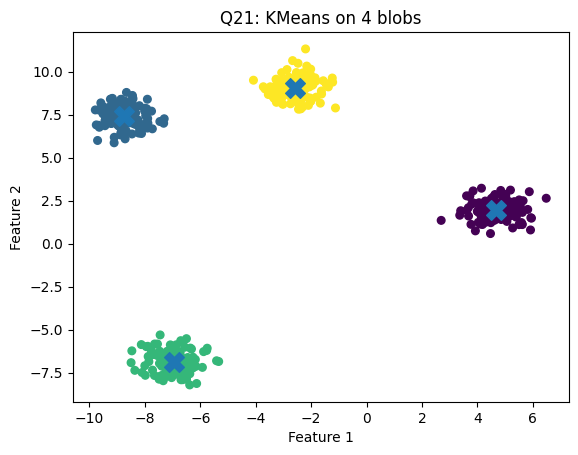

Cluster sizes: [125 125 125 125]


In [30]:
#21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

RANDOM_STATE = 42
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.60, random_state=RANDOM_STATE)
kmeans = KMeans(n_clusters=4, random_state=RANDOM_STATE).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.scatter(X[:,0], X[:,1], c=labels, s=30)
plt.scatter(centers[:,0], centers[:,1], marker='X', s=200)
plt.title('Q21: KMeans on 4 blobs')
plt.xlabel('Feature 1'); plt.ylabel('Feature 2')
plt.show()

print("Cluster sizes:", np.bincount(labels))


In [29]:
#22. Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import numpy as np

iris = load_iris()
X = iris.data
Xs = StandardScaler().fit_transform(X)
agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(Xs)

print("First 10 predicted labels:", labels[:10])
print("Cluster counts:", np.bincount(labels))


First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]
Cluster counts: [71 49 30]


/tmp/ipython-input-2190386764.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


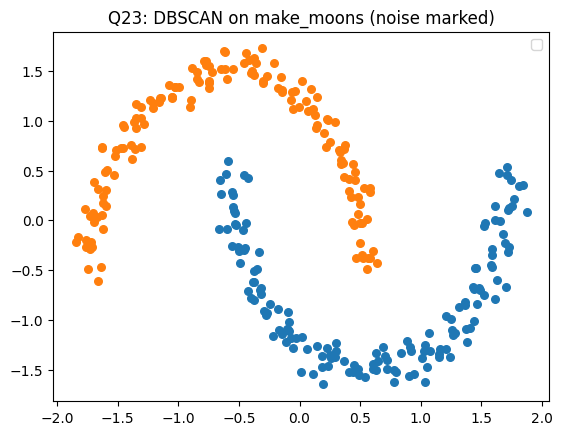

Noise points count: 0


In [28]:
#23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
Xs = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.25, min_samples=5).fit(Xs)
labels = db.labels_

plt.figure()
for lab in set(labels):
    pts = Xs[labels == lab]
    if lab == -1:
        plt.scatter(pts[:,0], pts[:,1], marker='x', s=50, label='noise')
    else:
        plt.scatter(pts[:,0], pts[:,1], s=30)
plt.title('Q23: DBSCAN on make_moons (noise marked)')
plt.legend()
plt.show()

print("Noise points count:", np.sum(labels == -1))


In [27]:
#24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

wine = load_wine()
X = wine.data
Xs = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42).fit(Xs)
labels = kmeans.labels_

print("Cluster sizes:", np.bincount(labels))


Cluster sizes: [65 51 62]


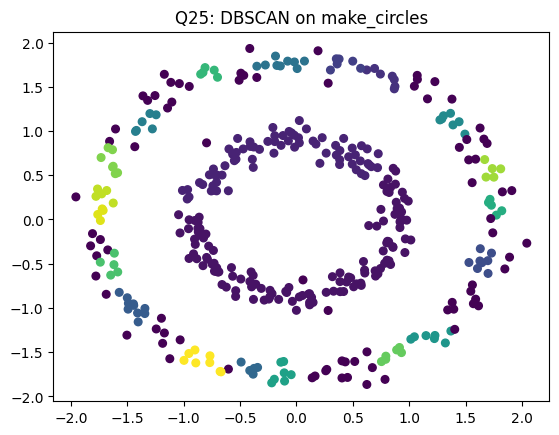

Labels unique: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [26]:
#25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X, _ = make_circles(n_samples=400, noise=0.05, factor=0.5, random_state=42)
Xs = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.15, min_samples=5).fit(Xs)
labels = db.labels_

plt.scatter(Xs[:,0], Xs[:,1], c=labels, s=30)
plt.title('Q25: DBSCAN on make_circles')
plt.show()

print("Labels unique:", np.unique(labels))


In [25]:
#26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import numpy as np

bc = load_breast_cancer()
X = bc.data
mms = MinMaxScaler().fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=42).fit(mms)

print("Cluster centroids (scaled space):\n", kmeans.cluster_centers_)
print("Cluster sizes:", np.bincount(kmeans.labels_))


Cluster centroids (scaled space):
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]
Cluster sizes: [189 380]


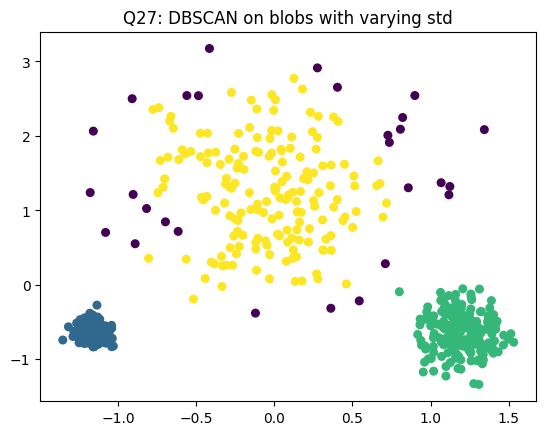

Unique labels (including noise -1): [-1  0  1  2]


In [24]:
#27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X, _ = make_blobs(n_samples=600, centers=[[0,0],[4,4],[8,0]], cluster_std=[0.2,1.5,0.5], random_state=42)
Xs = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.3, min_samples=8).fit(Xs)
labels = db.labels_

plt.scatter(Xs[:,0], Xs[:,1], c=labels, s=30)
plt.title('Q27: DBSCAN on blobs with varying std')
plt.show()

print("Unique labels (including noise -1):", np.unique(labels))


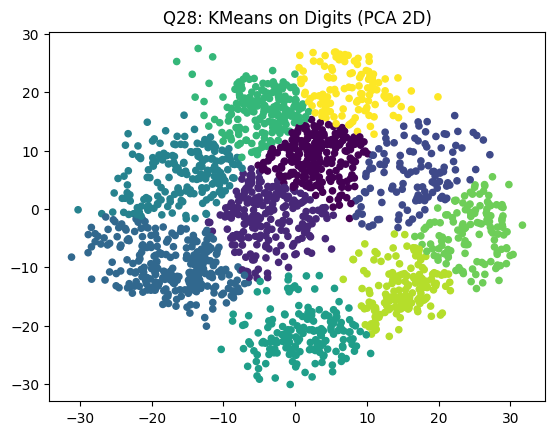

In [23]:
#28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
X = digits.data
pca2 = PCA(n_components=2, random_state=42).fit_transform(X)
kmeans = KMeans(n_clusters=10, random_state=42).fit(pca2)

plt.scatter(pca2[:,0], pca2[:,1], c=kmeans.labels_, s=20)
plt.title('Q28: KMeans on Digits (PCA 2D)')
plt.show()


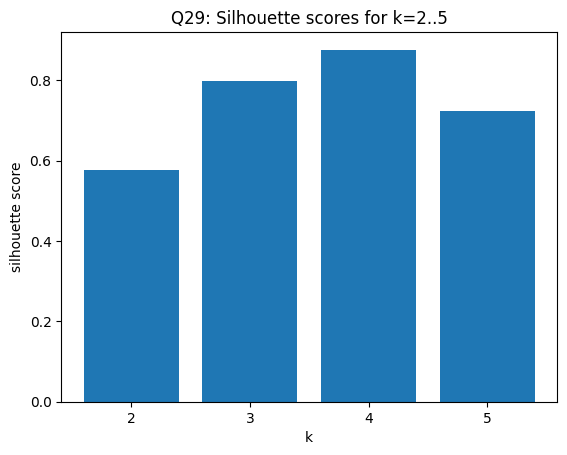

Scores: {2: np.float64(0.5762620877840752), 3: np.float64(0.7995592026332377), 4: np.float64(0.876354521706931), 5: np.float64(0.7236614920624375)}


In [22]:
#29. Generate synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=42)
ks = [2,3,4,5]
scores = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    scores.append(silhouette_score(X, km.labels_))

plt.bar([str(k) for k in ks], scores)
plt.title('Q29: Silhouette scores for k=2..5')
plt.xlabel('k'); plt.ylabel('silhouette score')
plt.show()

print("Scores:", dict(zip(ks, scores)))


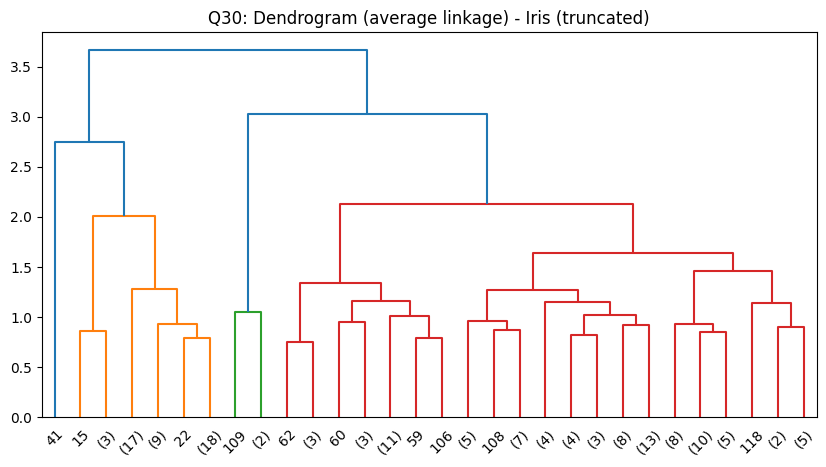

In [21]:
#30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

X = StandardScaler().fit_transform(load_iris().data)
Z = linkage(X, method='average')

plt.figure(figsize=(10,5))
dendrogram(Z, truncate_mode='lastp', p=30)
plt.title('Q30: Dendrogram (average linkage) - Iris (truncated)')
plt.show()


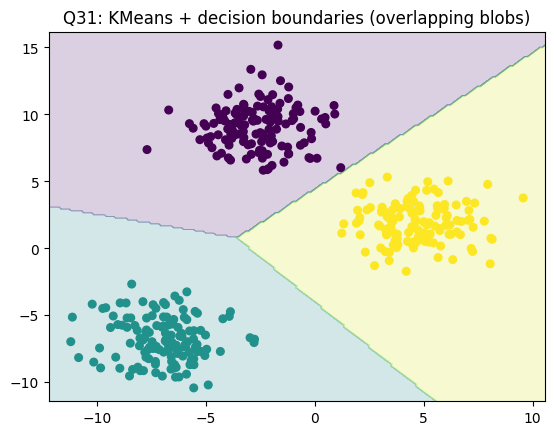

In [20]:
#31. Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=400, centers=3, cluster_std=1.6, random_state=42)
km = KMeans(n_clusters=3, random_state=42).fit(X)

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min,x_max,200), np.linspace(y_min,y_max,200))
grid = np.c_[xx.ravel(), yy.ravel()]
pred = km.predict(grid).reshape(xx.shape)

plt.contourf(xx, yy, pred, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=km.labels_, s=30)
plt.title('Q31: KMeans + decision boundaries (overlapping blobs)')
plt.show()


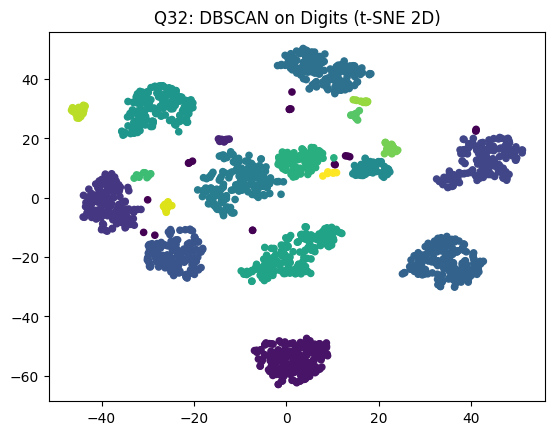

In [18]:
#32. Load the Digits dataset, reduce using t-SNE, then apply DBSCAN and visualize

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X = load_digits().data
X_tsne = TSNE(n_components=2, random_state=42, init='pca', perplexity=30).fit_transform(X)
db = DBSCAN(eps=2.5, min_samples=5).fit(X_tsne)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=db.labels_, s=20)
plt.title('Q32: DBSCAN on Digits (t-SNE 2D)')
plt.show()


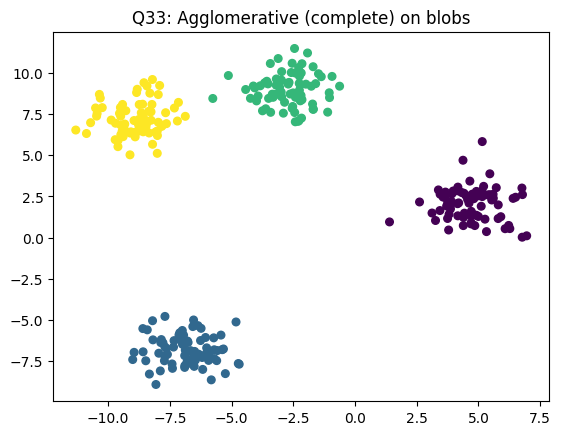

In [19]:
#33. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
agg = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(X)

plt.scatter(X[:,0], X[:,1], c=agg.labels_, s=30)
plt.title('Q33: Agglomerative (complete) on blobs')
plt.show()


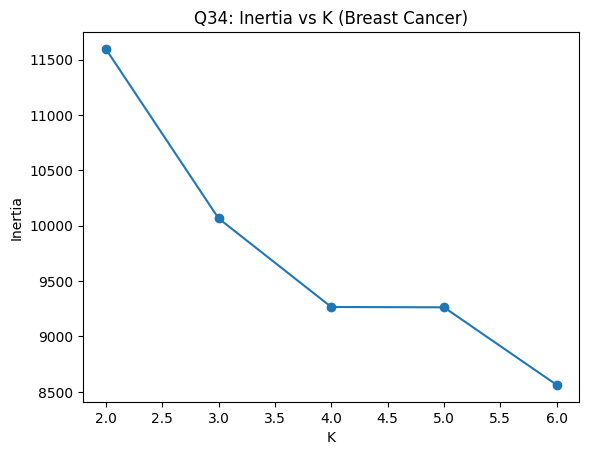

Inertias: {2: 11595.683312822128, 3: 10066.281842533346, 4: 9266.154235789782, 5: 9263.40481634534, 6: 8562.878816973262}


In [17]:
#34. Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = StandardScaler().fit_transform(load_breast_cancer().data)
ks = range(2,7)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42).fit(X)
    inertias.append(km.inertia_)

plt.plot(list(ks), inertias, marker='o')
plt.title('Q34: Inertia vs K (Breast Cancer)')
plt.xlabel('K'); plt.ylabel('Inertia')
plt.show()

print("Inertias:", dict(zip(ks, inertias)))


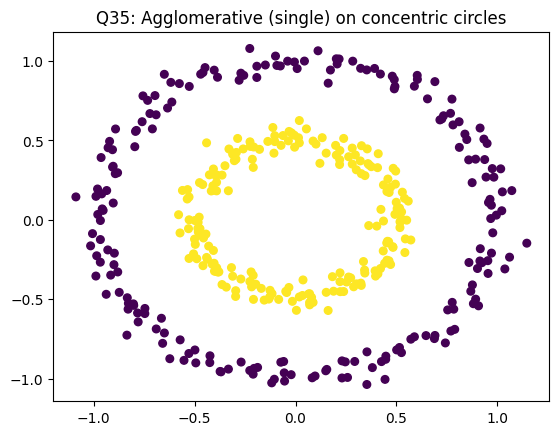

In [15]:
#35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage

from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=400, noise=0.05, factor=0.5, random_state=42)
agg = AgglomerativeClustering(n_clusters=2, linkage='single').fit(X)

plt.scatter(X[:,0], X[:,1], c=agg.labels_, s=30)
plt.title('Q35: Agglomerative (single) on concentric circles')
plt.show()


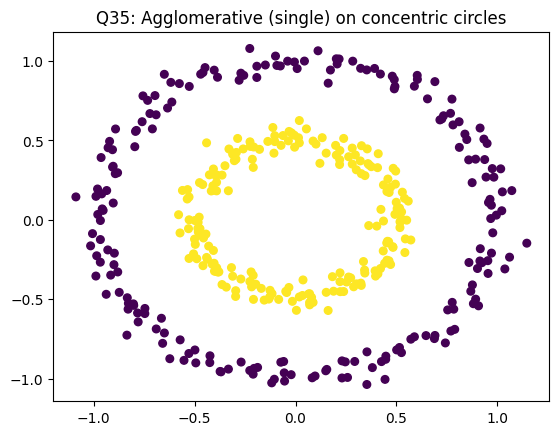

In [14]:
#35. Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage

from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=400, noise=0.05, factor=0.5, random_state=42)
agg = AgglomerativeClustering(n_clusters=2, linkage='single').fit(X)

plt.scatter(X[:,0], X[:,1], c=agg.labels_, s=30)
plt.title('Q35: Agglomerative (single) on concentric circles')
plt.show()


In [13]:
#36. Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise)

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

X = StandardScaler().fit_transform(load_wine().data)
db = DBSCAN(eps=1.2, min_samples=5).fit(X)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


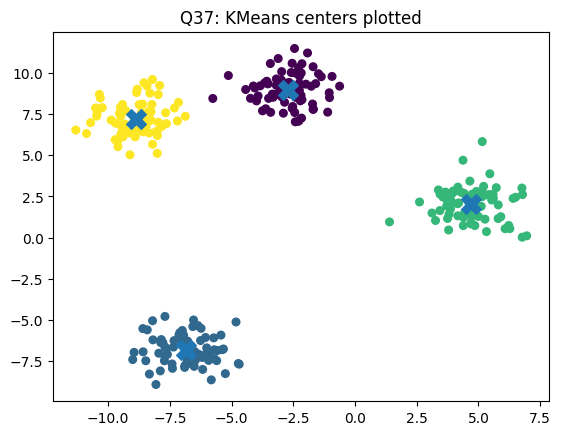

In [12]:
#37. Generate synthetic data using make_blobs and apply KMeans. Then plot the cluster centers on top of the data points

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)
km = KMeans(n_clusters=4, random_state=42).fit(X)

plt.scatter(X[:,0], X[:,1], c=km.labels_, s=30)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='X', s=200)
plt.title('Q37: KMeans centers plotted')
plt.show()


In [11]:
#38. Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

X = StandardScaler().fit_transform(load_iris().data)
db = DBSCAN(eps=0.6, min_samples=5).fit(X)

print("Number of noise samples (labels == -1):", np.sum(db.labels_ == -1))


Number of noise samples (labels == -1): 26


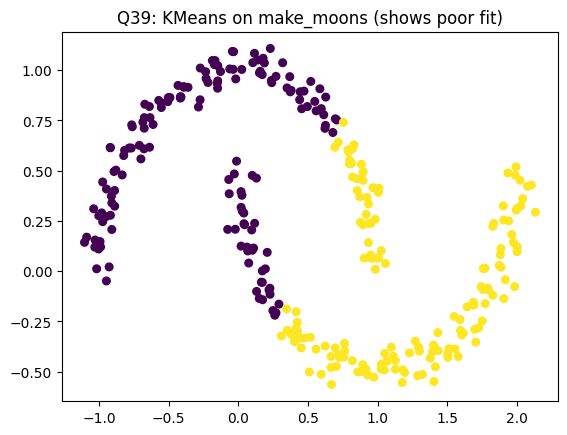

In [10]:
#39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
km = KMeans(n_clusters=2, random_state=42).fit(X)

plt.scatter(X[:,0], X[:,1], c=km.labels_, s=30)
plt.title('Q39: KMeans on make_moons (shows poor fit)')
plt.show()


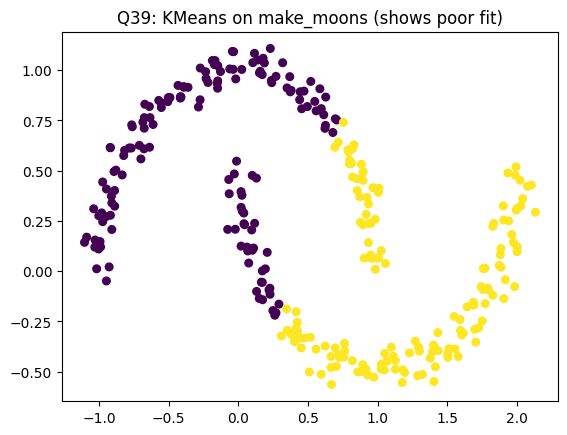

In [9]:
#39. Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
km = KMeans(n_clusters=2, random_state=42).fit(X)

plt.scatter(X[:,0], X[:,1], c=km.labels_, s=30)
plt.title('Q39: KMeans on make_moons (shows poor fit)')
plt.show()


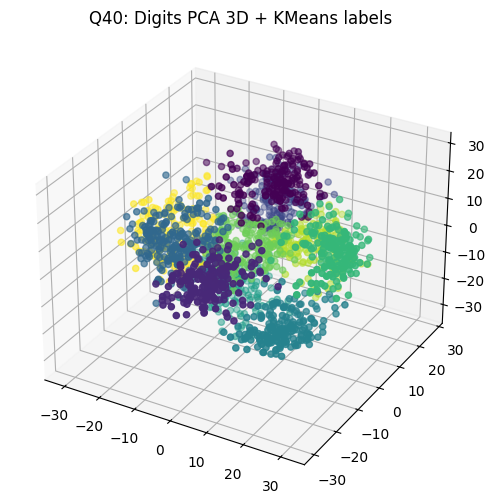

In [8]:
#40. Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = load_digits().data
pca3 = PCA(n_components=3, random_state=42).fit_transform(X)
km = KMeans(n_clusters=10, random_state=42).fit(pca3)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca3[:,0], pca3[:,1], pca3[:,2], c=km.labels_, s=20)
ax.set_title('Q40: Digits PCA 3D + KMeans labels')
plt.show()


In [7]:
#41. Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

X, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=42)
km = KMeans(n_clusters=5, random_state=42).fit(X)
sc = silhouette_score(X, km.labels_)

print("Silhouette score for k=5:", sc)


Silhouette score for k=5: 0.7993257411585863


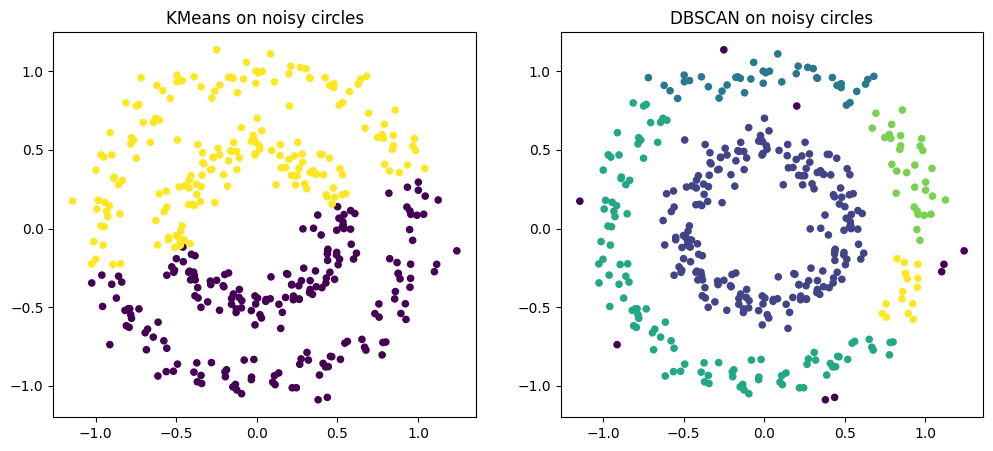

In [6]:
#43. Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side

from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=400, noise=0.08, factor=0.5, random_state=42)
km = KMeans(n_clusters=2, random_state=42).fit(X)
db = DBSCAN(eps=0.15, min_samples=5).fit(X)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.title('KMeans on noisy circles'); plt.scatter(X[:,0], X[:,1], c=km.labels_, s=20)
plt.subplot(1,2,2); plt.title('DBSCAN on noisy circles'); plt.scatter(X[:,0], X[:,1], c=db.labels_, s=20)
plt.show()


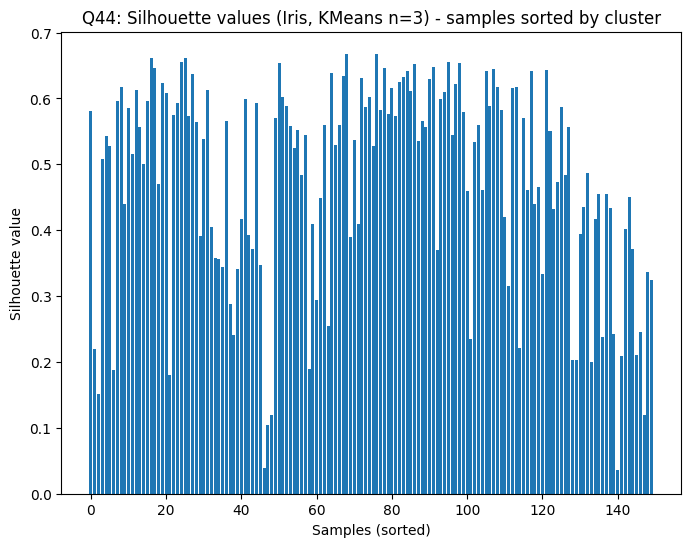

In [5]:
#44. Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import numpy as np
import matplotlib.pyplot as plt

X = StandardScaler().fit_transform(load_iris().data)
km = KMeans(n_clusters=3, random_state=42).fit(X)
sil_vals = silhouette_samples(X, km.labels_)
order = np.argsort(km.labels_)

plt.figure(figsize=(8,6))
plt.bar(range(len(sil_vals)), sil_vals[order])
plt.title('Q44: Silhouette values (Iris, KMeans n=3) - samples sorted by cluster')
plt.xlabel('Samples (sorted)'); plt.ylabel('Silhouette value')
plt.show()


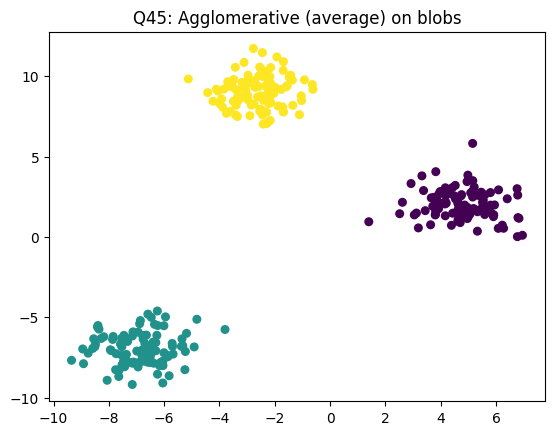

In [4]:
#45. Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
agg = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)

plt.scatter(X[:,0], X[:,1], c=agg.labels_, s=30)
plt.title('Q45: Agglomerative (average) on blobs')
plt.show()


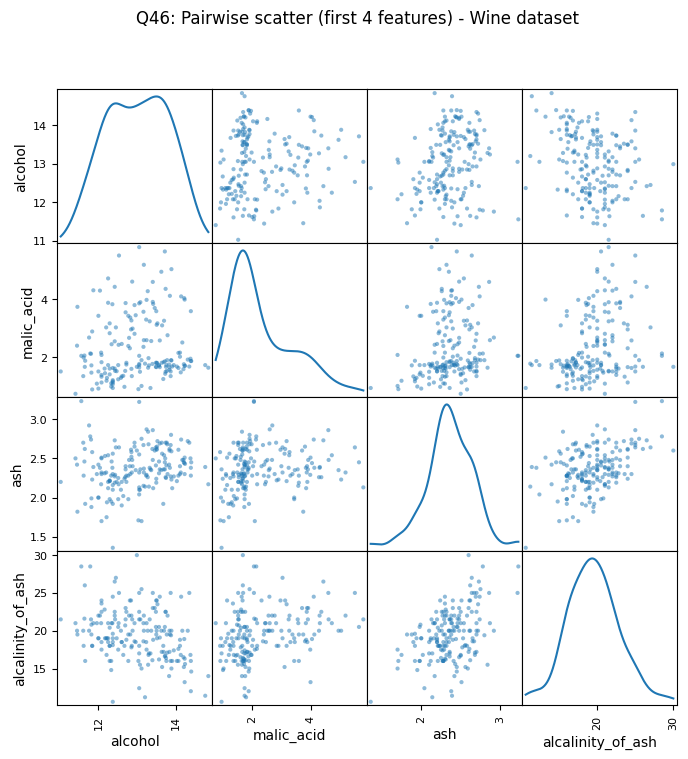

In [3]:
#46. Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a pairwise scatter (first 4 features)

from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

wine = load_wine()
df = pd.DataFrame(wine.data[:, :4], columns=wine.feature_names[:4])
km = KMeans(n_clusters=3, random_state=42).fit(df)
df['cluster'] = km.labels_.astype(str)

scatter_matrix(df.iloc[:, :4], figsize=(8,8), diagonal='kde')
plt.suptitle('Q46: Pairwise scatter (first 4 features) - Wine dataset')
plt.show()


In [2]:
#47. Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count

from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = make_blobs(n_samples=400, centers=3, cluster_std=1.4, random_state=42)
db = DBSCAN(eps=0.4, min_samples=7).fit(X)
labels = db.labels_
unique, counts = np.unique(labels, return_counts=True)

print("Label counts (including -1 for noise):")
for u,c in zip(unique, counts):
    print(u, c)
print("Noise points:", np.sum(labels == -1))


Label counts (including -1 for noise):
-1 306
0 11
1 20
2 21
3 10
4 8
5 8
6 9
7 7
Noise points: 306


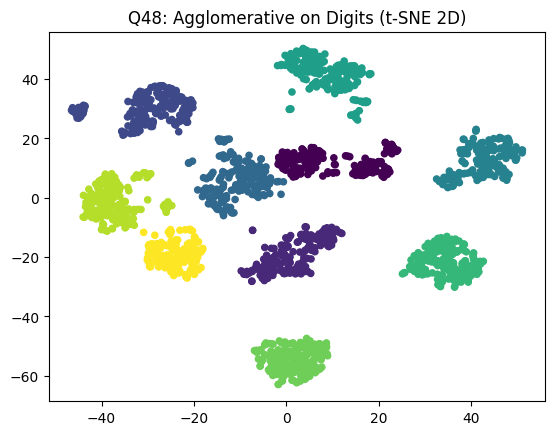

In [1]:
#48. Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X = load_digits().data
X_tsne = TSNE(n_components=2, random_state=42, init='pca', perplexity=30).fit_transform(X)
agg = AgglomerativeClustering(n_clusters=10).fit(X_tsne)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=agg.labels_, s=20)
plt.title('Q48: Agglomerative on Digits (t-SNE 2D)')
plt.show()
